# **Project Name**    - Vehicle Insurance Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


Our client is an Insurance company that has provided Health Insurance to its customers, now they need our help in **building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company**.

In order to predict whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("D:\python.practice\My_project\Vehicle INSURANCE_Prediction\TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [3]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [39]:
df.shape

(381109, 12)

In [6]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Exploratory Data Analysis

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
print(len(df[df.duplicated()]))

0


In [11]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

### Analysing Data

Text(0.5, 1.0, 'Count of Previously Insured')

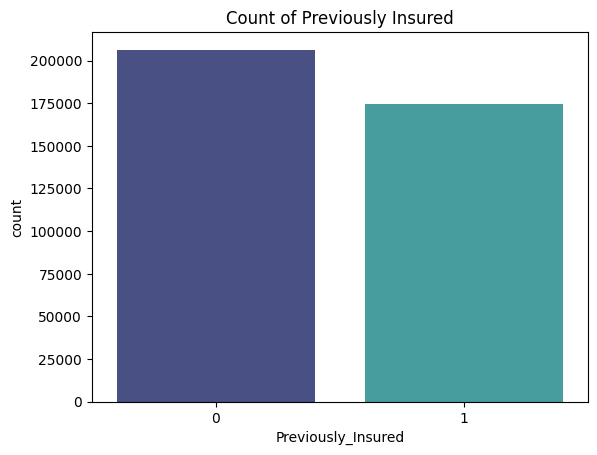

In [12]:
sns.countplot(x=df['Previously_Insured'], data=df, palette='mako')
plt.title('Count of Previously Insured')

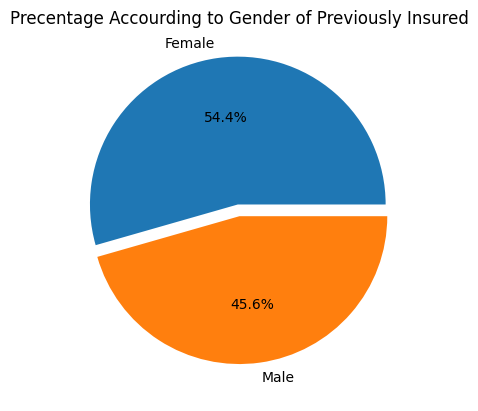

In [13]:
Gender_Insured = pd.DataFrame()
Gender_Insured['Gender'] = df.groupby('Gender')['Previously_Insured'].mean() * 100

plt.pie(Gender_Insured.Gender,labels=Gender_Insured.index,autopct='%1.1f%%',explode=[.08,0])
plt.title('Precentage Accourding to Gender of Previously Insured', color='Black');

Text(0.5, 1.0, 'Count of Response')

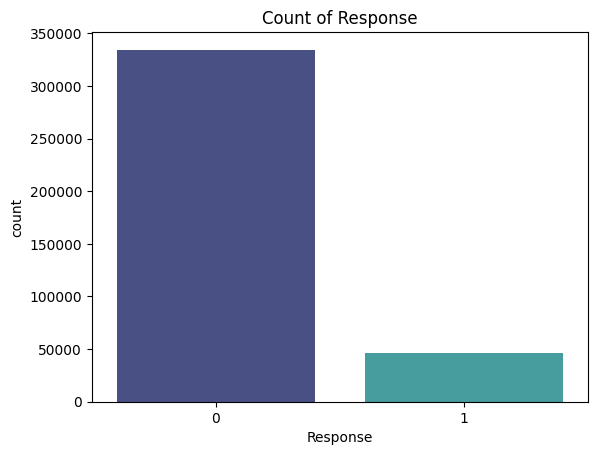

In [14]:
sns.countplot(x=df['Response'], data=df, palette='mako')
plt.title('Count of Response')

Text(0.5, 1.0, 'Average Age of Male And Female')

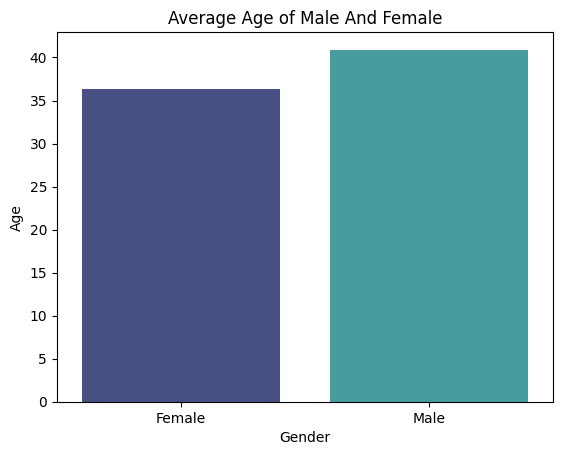

In [15]:
l1 = df.groupby('Gender')['Age'].mean()
sns.barplot(l1, color='Purple',palette='mako')
plt.title('Average Age of Male And Female')

Text(0.5, 1.0, 'Count of Vechical Age')

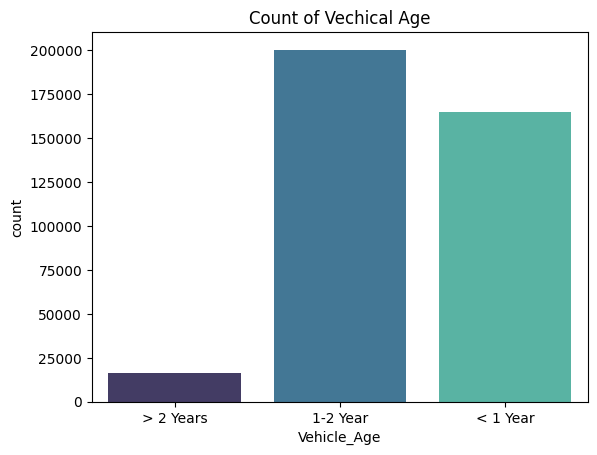

In [16]:
sns.countplot(x=df['Vehicle_Age'], data=df, palette='mako')
plt.title('Count of Vechical Age')

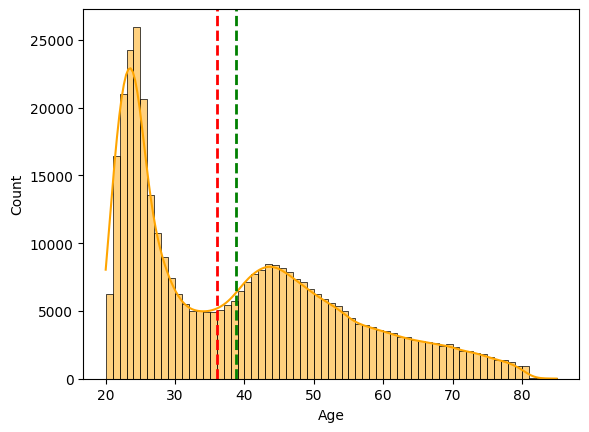

In [17]:
# # Plotting histplot for 'Age' column and visualzing mean (green line) and median (red line)

sns.histplot(df['Age'],kde=True,color='orange',bins=np.arange(df['Age'].min(), df['Age'].max() + 1))
plt.axvline(df['Age'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Age'].median(), color='red', linestyle='dashed', linewidth=2)

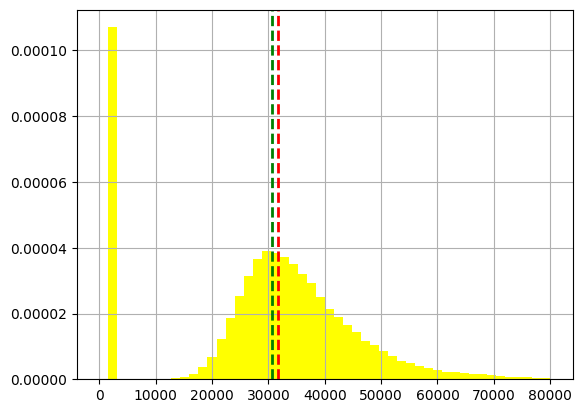

In [3]:
# Plotting histplot for 'Annual_Premium' column and visualzing mean (green line) 
#    and median (red line)df['Annual_Premium'].hist(bins = 50, density = True, range=[0, 80000],color='yellow')

df['Annual_Premium'].hist(bins = 50, density = True, range=[0, 80000],color='yellow')
plt.axvline(df['Annual_Premium'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Annual_Premium'].median(), color='red', linestyle='dashed', linewidth=2)

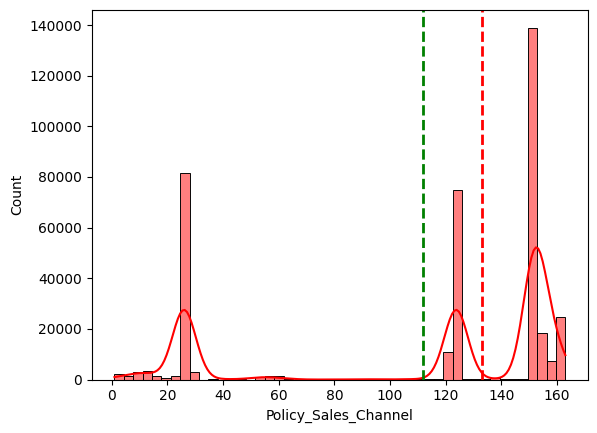

In [19]:
# Plotting histplot for 'Policy_Sales_Channel' column and visualzing mean (green line) and median (red line)

sns.histplot(x=df['Policy_Sales_Channel'],kde=True,color='red')
plt.axvline(df['Policy_Sales_Channel'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Policy_Sales_Channel'].median(), color='red', linestyle='dashed', linewidth=2)

Text(0.5, 1.0, 'Response vs Gender')

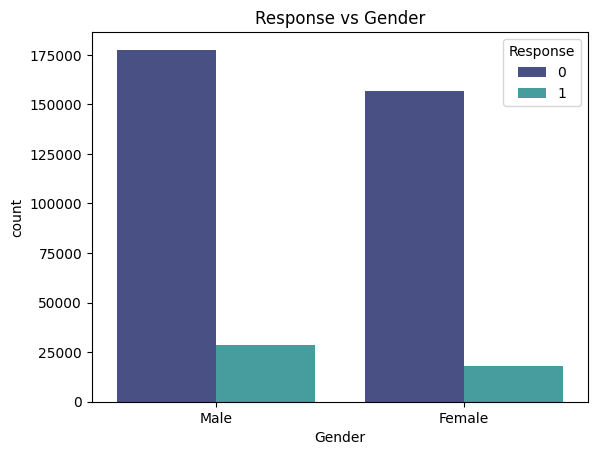

In [20]:
# Plotting bartplot for 'Response' vs 'Gender' column

sns.countplot(x='Gender',hue='Response',palette="mako", data=df)
plt.title('Response vs Gender')

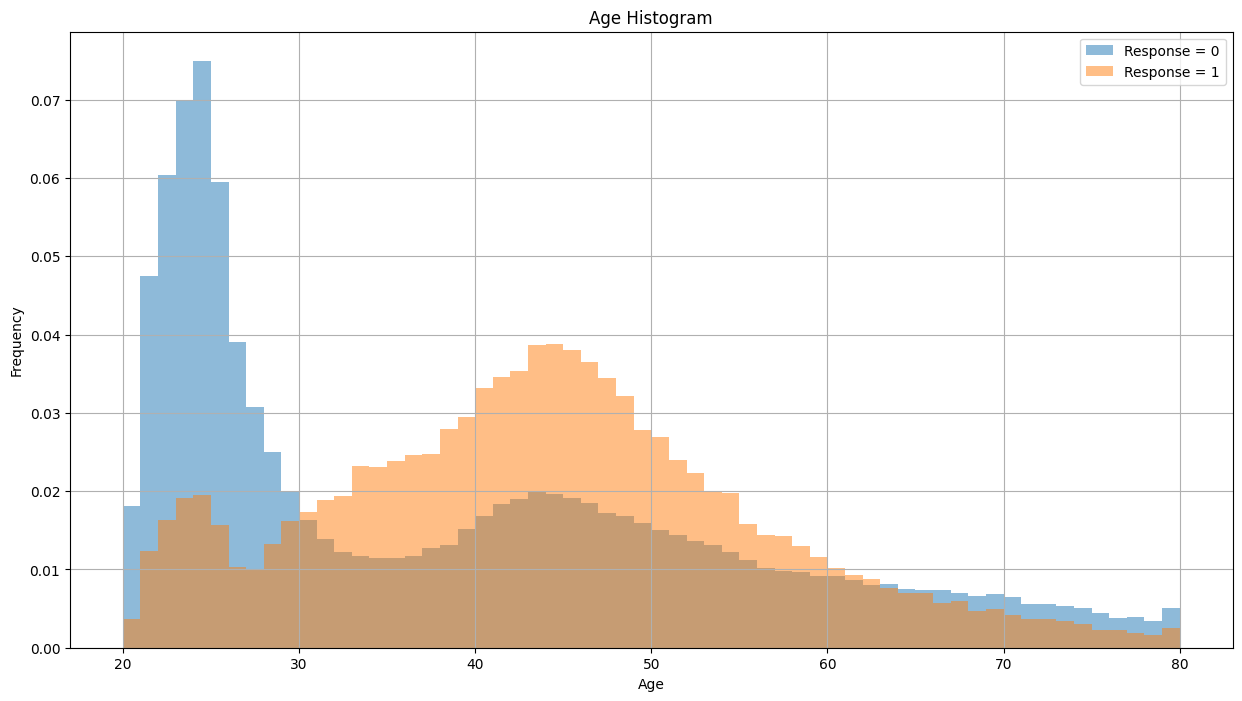

In [21]:
# Plotting bartplot for 'Response' vs 'Age' column

df.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

Text(0.5, 1.0, 'Response Vs Vehicle_Damage')

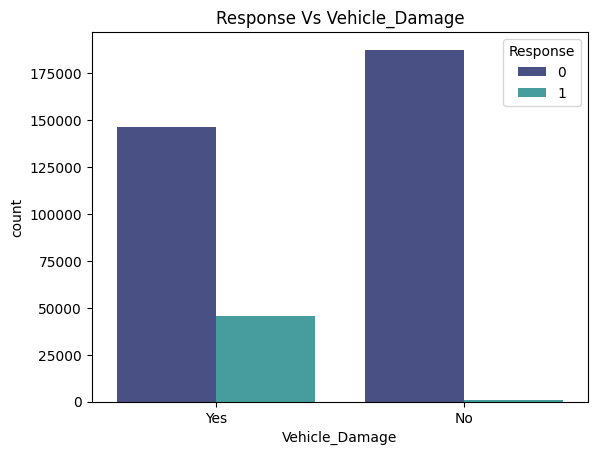

In [22]:
# Plotting bartplot for 'Response' vs 'Vehicle_Damage' column

sns.countplot(x='Vehicle_Damage',hue='Response',palette="mako", data=df);
plt.title('Response Vs Vehicle_Damage')

#### Null Values 

In [23]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [3]:
df.replace({'?':np.nan},inplace=True)

In [4]:
df.isnull().sum() / df.shape[0] * 100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

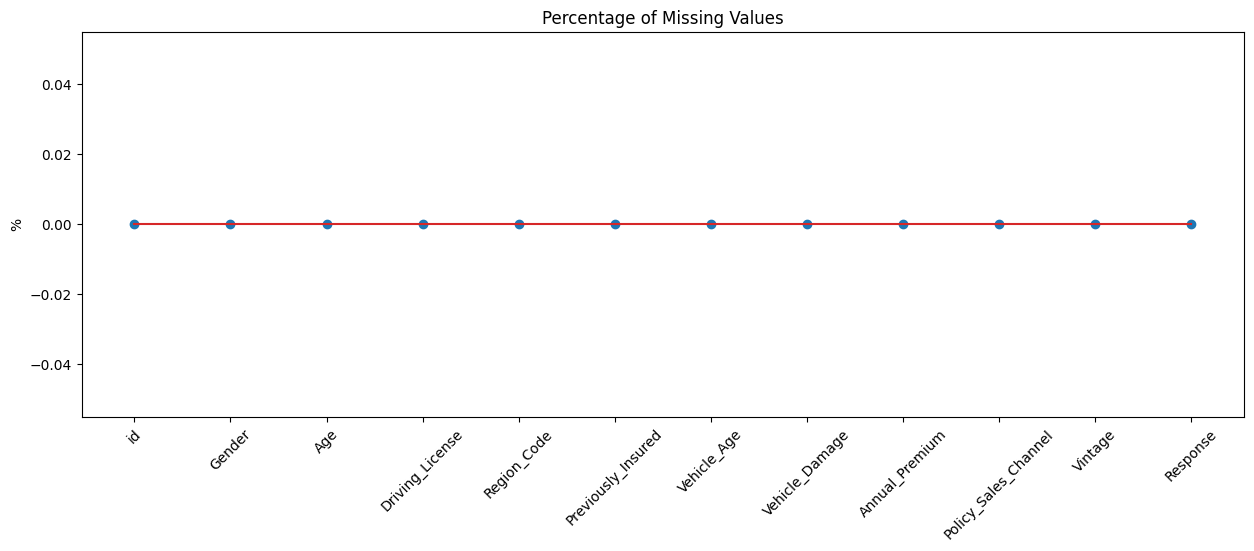

In [26]:
missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

#### Object Columns

In [5]:
df.drop({'id'},axis=1,inplace=True)

In [6]:
df.select_dtypes(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [31]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [32]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [33]:
df.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.145545,-0.018374,0.000604,-0.081932,-0.112625,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.522300,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.018374,-0.079782,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.027840,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.081932,-0.254682,0.014969,-0.024659,1.000000,0.174783,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.112625,-0.522300,0.030173,-0.027840,0.174783,1.000000,-0.174238,0.023656,0.388551,0.002484,-0.104078
Vehicle_Damage,0.091606,0.267534,-0.016622,0.028235,-0.824143,-0.174238,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.023656,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.111159,-0.577826,0.043731,-0.042420,0.219381,0.388551,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.002517,-0.001264,-0.000848,-0.002750,0.002537,0.002484,-0.002064,-0.000608,0.000002,1.000000,-0.001050


<Axes: >

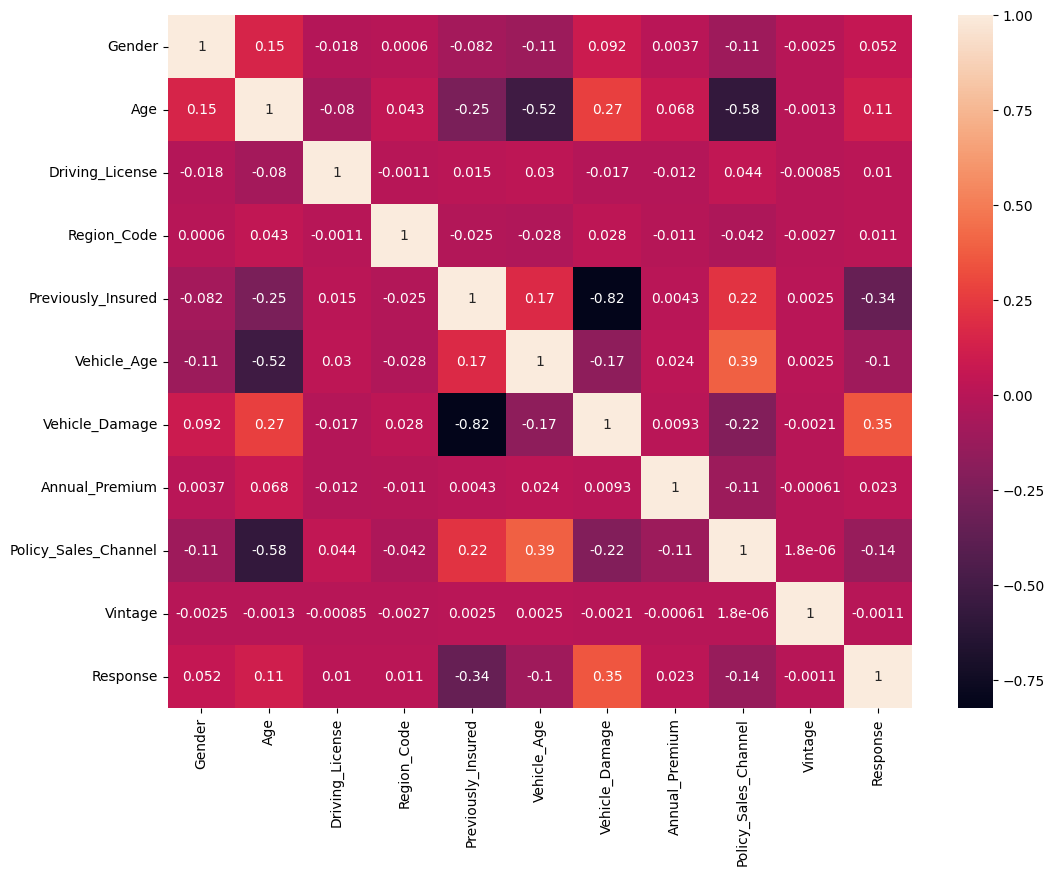

In [34]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr() , annot=True)

## Model Building

In [9]:
# Train and Test split

from sklearn.model_selection import train_test_split

#### Handling Imbalanced Dataset

In [10]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

Text(0.5, 1.0, 'Showing Imbalanced data')

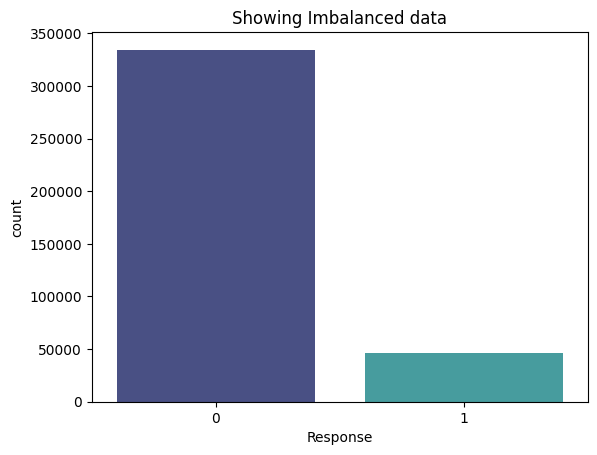

In [11]:
sns.countplot(x=df['Response'], data=df, palette='mako')
plt.title('Showing Imbalanced data')

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
X=df.drop(['Response'],axis=1)
y=df['Response']

In [14]:
sm=SMOTE()
x_new, y_new = sm.fit_resample(X, y.ravel())

print("Before Using SMOTE, counts of label '1': {}".format(sum(y == 1)))
print("Before Using SMOTE, counts of label '0': {} \n".format(sum(y == 0)))
print("After Using SMOTE, counts of label '1': {}".format(sum(y_new == 1)))
print("After Using SMOTE, counts of label '0': {} \n".format(sum(y_new == 0)))
print('\n')

Before Using SMOTE, counts of label '1': 46710
Before Using SMOTE, counts of label '0': 334399 

After Using SMOTE, counts of label '1': 334399
After Using SMOTE, counts of label '0': 334399 





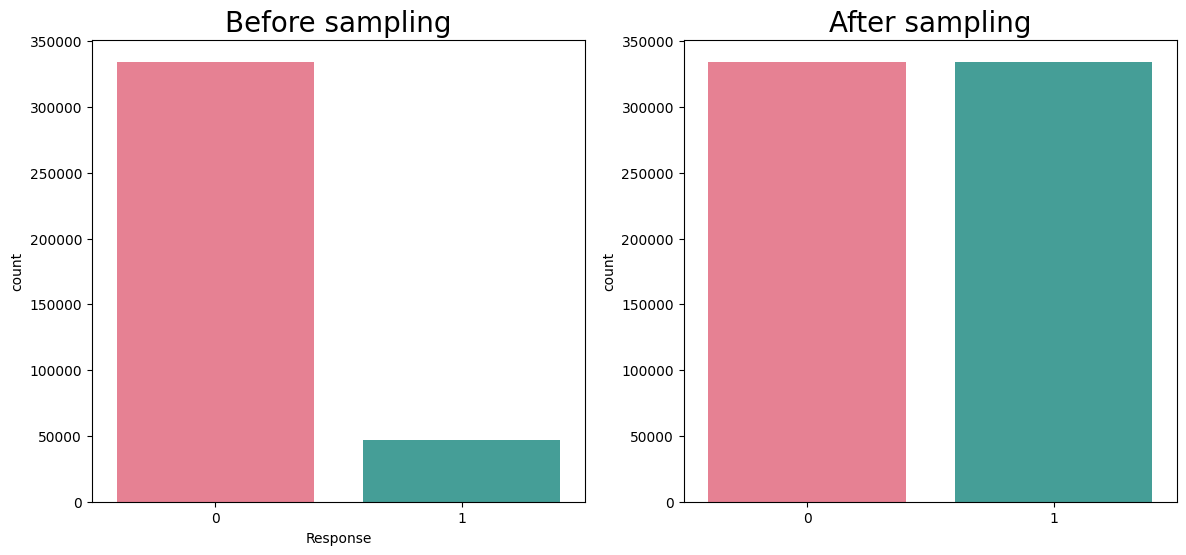

In [15]:
# Visualizing the balanced dataset

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x=df['Response'], data=df, palette='husl')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x= y_new,palette='husl')
plt.title('After sampling',fontsize=20)
plt.show()

#### Spilt dataset of X variable and Y variable

In [16]:
df_train_x,df_test_x ,df_train_y, df_test_y= train_test_split(x_new,y_new, test_size= 0.20 , random_state=101)

## 1. Logistic Regression model

In [17]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()

In [18]:
Logistic.fit(df_train_x, df_train_y)

LogisticRegression()

In [19]:
pred_test_logistic = Logistic.predict(df_test_x)
pred_test_proba_logistic = Logistic.predict_proba(df_test_x)[:,1]

In [20]:
conf_logistic = confusion_matrix(df_test_y,pred_test_logistic)
conf_logistic

array([[39518, 27582],
       [22741, 43919]])

In [21]:
print(classification_report(df_test_y,pred_test_logistic))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61     67100
           1       0.61      0.66      0.64     66660

    accuracy                           0.62    133760
   macro avg       0.62      0.62      0.62    133760
weighted avg       0.62      0.62      0.62    133760



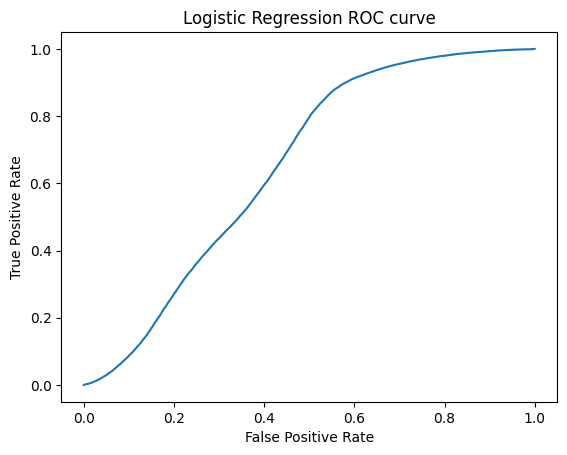

In [24]:
#ROC Curve
fpr, tpr, _ = roc_curve(df_test_y, pred_test_proba_logistic)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.show()

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an **overall accuracy of 62%**, meaning that it correctly classified 62 % of the instances in the training set. **The precision for class 1 is 61%**, meaning that when the model predicted a class 1 Not good, it was correct 61 % of the time. **The recall for class 1 is 66%**, meaning that the model correctly identified 66 % of the actual class 1 instances in the dataset. **The F1-score for class 1 is 64%**.


##  Hyperparameter Tuning for Logistic

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(Logistic, param_grid, cv=5)

In [27]:
grid_lr.fit(df_train_x , df_train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [55]:
# Predict on the model
y_pred_gcv = grid_lr.predict(df_test_x)

In [56]:
print(classification_report(df_test_y , y_pred_gcv))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67     67100
           1       0.67      0.64      0.65     66660

    accuracy                           0.66    133760
   macro avg       0.66      0.66      0.66    133760
weighted avg       0.66      0.66      0.66    133760



In [57]:
print("Best cross-validation score:", grid_lr.best_score_)
print("Best parameters:", grid_lr.best_params_)

Best cross-validation score: 0.7186164757720206
Best parameters: {'C': 0.01}


The best **cross-validation score achieved was 0.74**, and the best hyperparameter value for **C was found to be 0.001**.

After training the model with the best hyperparameters, the test set score was also found to be 74. This suggests that the model is performing consistently well on both the training and test sets, and that it is unlikely to be overfitting.

Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an **f1 score of 80**.

## 2. Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

In [23]:
dec.fit(df_train_x, df_train_y)

DecisionTreeClassifier()

In [24]:
pred_test_decision = dec.predict(df_test_x)

In [25]:
conf_dec = confusion_matrix(df_test_y , pred_test_decision)
conf_dec

array([[58368,  8732],
       [ 7420, 59240]])

In [26]:
print(classification_report(df_test_y,pred_test_decision))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     67100
           1       0.87      0.89      0.88     66660

    accuracy                           0.88    133760
   macro avg       0.88      0.88      0.88    133760
weighted avg       0.88      0.88      0.88    133760



The ML model used is Decision Tree for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.88**, which means that 88% of the predictions made by the model are correct. **The precision for class 1 is 0.87**, which means that out of all the positive predictions made for class 1, 87% of them are actually correct. **The recall for class 1 is 0.89**, which means that out of all the actual positive instances of class 1, the model correctly identified 89% of them. **The F1-score for class 1 is 0.88**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### Hyperparameter Tuning of Decision Tree

In [63]:
Decision_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20],
    'min_samples_split':[25,50,75,100]
}

In [64]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dec, Decision_grid)

In [65]:
grid.fit(df_train_x , df_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 20],
                         'min_samples_split': [25, 50, 75, 100]})

In [66]:
grid_predict_decision = grid.predict(df_test_x)
confusion_matrix(df_test_y , grid_predict_decision)

array([[56665, 10435],
       [ 7349, 59311]])

In [68]:
print(classification_report(df_test_y,grid_predict_decision ))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86     67100
           1       0.85      0.89      0.87     66660

    accuracy                           0.87    133760
   macro avg       0.87      0.87      0.87    133760
weighted avg       0.87      0.87      0.87    133760



we did not see any improvement here.

## 3.Random Forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier()

In [28]:
Random.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [29]:
pred_test_Random = Random.predict(df_test_x)

In [30]:
confusion_matrix(df_test_y ,pred_test_Random)

array([[58243,  8857],
       [ 6131, 60529]])

In [31]:
print(classification_report(df_test_y,pred_test_Random))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89     67100
           1       0.87      0.91      0.89     66660

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760



The ML model used is Random Forest for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.89**, which means that 89% of the predictions made by the model are correct. **The precision for class 1 is 0.87**, which means that out of all the positive predictions made for class 1, 87% of them are actually correct. **The recall for class 1 is 0.91**, which means that out of all the actual positive instances of class 1, the model correctly identified 91% of them. **The F1-score for class 1 is 0.89**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.



## 4. K-Nearest Neighbors (KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [13]:
knn.fit(df_train_x, df_train_y)

KNeighborsClassifier()

In [14]:
pred_test_knn = knn.predict(df_test_x)

In [16]:
conf_knn = confusion_matrix(df_test_y , pred_test_knn)
conf_knn

array([[45087, 22013],
       [ 3108, 63552]])

In [17]:
print(classification_report(df_test_y, pred_test_knn))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     67100
           1       0.74      0.95      0.83     66660

    accuracy                           0.81    133760
   macro avg       0.84      0.81      0.81    133760
weighted avg       0.84      0.81      0.81    133760



The ML model used is K-Nearest Neighbors for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 0.81**, which means that 81% of the predictions made by the model are correct. **The precision for class 1 is 0.74**, which means that out of all the positive predictions made for class 1, 74% of them are actually correct. **The recall for class 1 is 0.95**, which means that out of all the actual positive instances of class 1, the model correctly identified 95% of them. **The F1-score for class 1 is 0.83**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have chosen f1-score score as it is best able to explain the fit of the data by taking the harmonic mean of precision score & recall score. F1-score is also the unweighted mean of these scores across all classes. In the best case, the macro average for precision, recall, and F1-score is 89 %.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen Random Forest Regressor as my final classifier model. With a f1-score score of 89 %, we can consider random forest classifier as our best model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [32]:
features = x_new.columns
importances = Random.feature_importances_
indices = np.argsort(importances)

In [36]:
x_new.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

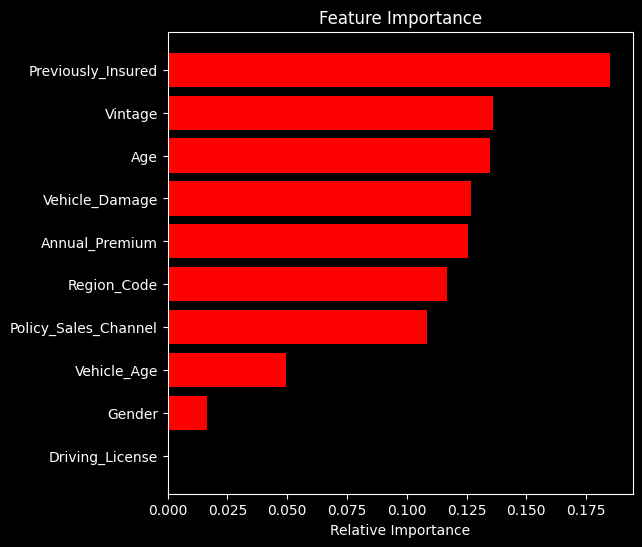

In [37]:
#Plotting figure
plt.figure(figsize=(6,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

As we can see from the feature importance graph, the feature 'Previously_Insured_yes' can be considered as most important with relative importance of 0.2. The next 4 features are vintage, annual_premium, age and vehicle_damage-yes can be considered with relative importance ranging from 0.125-0.175. As these 5 main features play a role in decreasing the value of entropy, the machine learning model, random forest classifier considers them closer to the root node.

# **Conclusion**

In our analysis, we initially performed EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Response' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We then later label Encoder the categorical variables.

Next we implemented 4 machine learning algorithms Logistic Regression, Random Forest , Decision Tree and KNN. We did some hyperparameter tuning to improve our model performance.

Out of all above models Random forest Classifier gives the highest F1-score of 89% for test Set.
No overfitting is seen.
<br>

**So finally, the insurance company can deploy a machine learning model that uses Random Forest Classifier to predict the wheather the already existing health insurance customer would be interested in a vehicle insurance product. The company can improve the conversion rate by taking steps to encourage people to buy vehicle insurance by offering some incentives/ease of application & claim settlement process. Cross selling might be an effective way to increase the profits since the customer acquisition cost still remains 0.**